Q1. Image denoted as f(x, y), is transformed to image g(x,y). g(x,y) is 3 times larger along y-axis and 2 times larger along x-axis than f(x, y). Also g(x,y) is at 6 units horizontal and 7 units vertical distance from f(x,y).
Write a code to do this. Show f(x,y) and g(x,y).
Compute h(x,y), third image, by rotating pixels of image 2, g(x,y) by 75◦ degrees counter clockwise.
Write a code to do this. Show f(x,y), g(x,y) and h(x,y).
Make your code generic enough so that you can do these transformations with any given values or images.

Answer below:

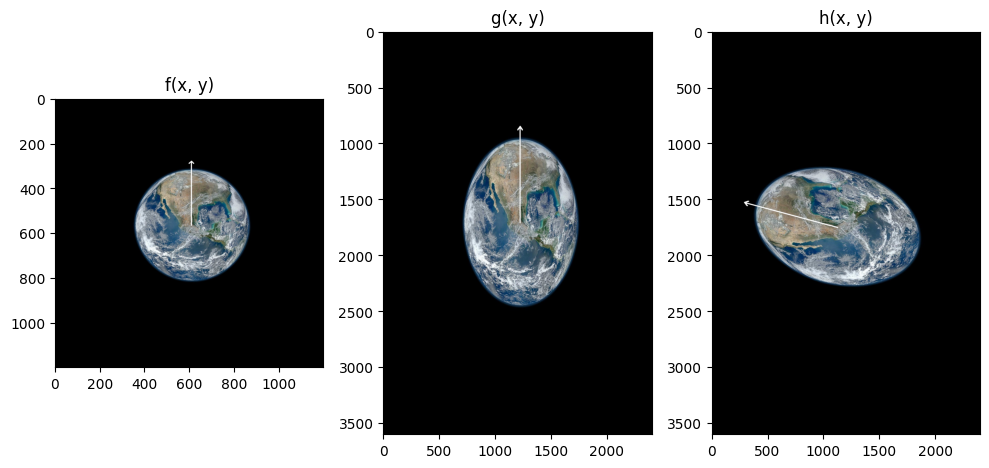

In [11]:
"""
Image denoted as f(x, y), is transformed to image g(x,y). g(x,y) is 3 times larger along y-axis and 2 times larger along x-axis than f(x, y). Also g(x,y) is at 6 units horizontal and 7 units vertical distance from f(x,y).
Write a code to do this. Show f(x,y) and g(x,y).
Compute h(x,y), third image, by rotating pixels of image 2, g(x,y) by 75◦ degrees counter clockwise.
Write a code to do this. Show f(x,y), g(x,y) and h(x,y).
Make your code generic enough so that you can do these transformations with any given values or images.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import matplotlib.image as mpimg
import cv2

def transform_image(input_image, scale_x, scale_y, translate_x, translate_y):
    # Scaling
    scaled_image = np.zeros((int(input_image.shape[0] * scale_y), int(input_image.shape[1] * scale_x), input_image.shape[2]), dtype=np.uint8)
    for y in range(input_image.shape[0]):
        for x in range(input_image.shape[1]):
            scaled_image[int(y*scale_y):(int(y+1)*scale_y), int(x*scale_x):(int(x+1)*scale_x), :] = input_image[y, x, :]

    # Translation
    translated_image = np.zeros_like(scaled_image)
    translated_image[translate_y:, translate_x:, :] = scaled_image[:-translate_y, :-translate_x, :]

    return translated_image

def rotate_image(input_image, angle_degrees):
    rotated_image = rotate(input_image, angle_degrees, reshape=False)
    return rotated_image

# Read an image from file
# Input image file path here
# You can input any type of image, colour or grayscale
image_path = 'earth.jpg'
fc = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Perform the first transformation to get g(x, y)
# Input values in this order:
# transform_image(input_image, scale_x, scale_y, translate_x, translate_y)
g = transform_image(fc, 2, 3, 6, 7)

# Perform the second computation to get h(x, y)
# Rotation can be done by changing degrees
# Input values in this order:
# rotate_image(input_image, angle_degrees)
h = rotate_image(g, 75)

# Display the images
plt.figure(figsize=(10, 8))

# Displaying f(x,y)
plt.subplot(131)
plt.imshow(cv2.cvtColor(fc, cv2.COLOR_BGR2RGB))
plt.title('f(x, y)')

# Displaying g(x,y)
plt.subplot(132)
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
plt.title('g(x, y)')

# Displaying h(x,y)
plt.subplot(133)
plt.imshow(cv2.cvtColor(h, cv2.COLOR_BGR2RGB))

plt.title('h(x, y)')

plt.tight_layout()
plt.show()

